# Asteroid Classification

In this dataset, I trained a logistic regression model and an SVM model to classify whether an asteroid is hazardous or not.

I also graphed the decision boundary of each model to gain a visual understanding of how that model splits the data.

The NASA: Asteroids Classification dataset can be found [here](https://www.kaggle.com/shrutimehta/nasa-asteroids-classification).

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load data
asteroids_data = pd.read_csv('nasa.csv')

In [4]:
asteroids_data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


The target variable, **Hazardous**, has labels True and False. We will transform these labels to the binary, 1 and 0, where 1 is True and 0 is False.

In [5]:
#binarising Hazardous
asteroids_data['Hazardous'].replace({True: 1, False: 0}, inplace = True)

In [6]:
asteroids_data['Hazardous'].value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64


**COLUMNS**
* **Neo Reference ID** - Near Earth Object (NEO) reference ID number for an asteroid (or a comet) which comes close to earth
* **Name** - 'Name' of asteroid (same as NEO Reference ID)
* **Absolute Magnitude** - A measure of the asteroid's luminosity (in H) (the brightness of an asteroid if it is 1 astronomical unit away from both the Sun and the observer, and the angle between the Sun, asteroid, and Earth is 0 degrees) 
* **Est Dia in (in KM, M, Miles, and Feet) (min)** - Minimum estimated diameter of the asteroid (Note: Since asteroids cannot be directly measured and because they have irregular shapes, their diameters are estimates. These estimates are calculated using its absolute magnitude and geometric albedo.)   
* **Est Dia in (in KM, M, Miles, and Feet) (max)**  - Maximum estimated diameter of the asteroid      
* **Close Approach Date** - Date at which the asteroid approaches close to Earth      
* **Epoch Date Close Approach** - Date at which the asteroid approaches close to Earth (in epoch time)   
* **Relative Velocity (in km per sec, km per hr, and miles per hour)** - Asteroid's velocity relative to earth
* **Miss Dist.(in Astronomical, lunar, km, and miles)** - Distance by which the asteroid misses Earth
* **Orbiting Body**                   
* **Orbit ID** - An ID of JPL NEA orbit that JPL Nasa uses in its analysis               
* **Orbit Determination Date** - Date at which the asteroid's orbit was determined
* **Orbit Uncertainity** - A measure of the uncertainity ('measurement errors') in the calculated orbit 
* **Minimum Orbit Intersection** - The closest distance between Earth and the asteroid in their respective orbits (in astronomical units)
* **Jupiter Tisserand Invariant** -  A value used to differentiate between asteroids and Jupiter-family comets    
* **Epoch Osculation** - The instance of time at which the asteroid's position and velocity vectors (from which its osculating orbit is calculated) is specified           
* **Eccentricity** - A value which specifies by how much the asteroid's orbit deviates from a perfect circle               
* **Semi Major Axis** - The longest radius of an elliptical orbit; a easure of the asteroid's average distance from the Sun  (asteroids orbit the Sun)              
* **Inclination** - Measures the tilt of the asteroid's orbit around the Sun                 
* **Asc Node Longitude** - (copying from NASA) 'Angle in the ecliptic plane between the inertial-frame x-axis and the line through the ascending node'
* **Orbital Period** - Time taken for asteroid to complete a single orbit around the Sun
* **Perihelion Distance** - Distance of point in asteroid's orbit which is closest to the Sun
* **Perihelion Arg** - (copying from Nasa) 'The angle (in the body's orbit plane) between the ascending node line and perihelion measured in the direction of the body's orbit'
* **Aphelion Dist** - Distance of point in asteroid's orbit which is farthest from the Sun
* **Perihelion Time** - Length of time of asteroid's passage through the perihelion stage
* **Mean Anomaly** - (copying from Nasa) 'The product of an orbiting body's mean motion and time past perihelion passage'
* **Mean Motion** - (copying from Nasa) 'The angular speed required for a body to make one orbit around an ideal ellipse with a specific semi-major axis'
* **Equinox** - An astronomical standard to measure against (currently 'J2000.0')
* **Hazardous** - Is the asteroid hazardous? (True or False)  

First, we will collate all the variables (except the target **Hazardous**) in a list called **features**, and we will drop the features we have decided not to include in the model as we go along. 

In [7]:
#list of features
features = asteroids_data.columns.tolist()
features = features[0:-1]
#check
print(features)

['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body', 'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Equinox']


In [8]:
asteroids_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

This is a small dataset with only 4687 instances. There are 40 attributes but a few of them measure the same feature of the asteroid but in different standards. These attributes are **Est Dia** (in various measures), **Close Approach Date** and **Epoch Date Close Approach**, **Relative Velocity** (in various measures), and **Miss Dist.**(in various measures). There are no missing values.

There are 5 non-numerical attribute, of which one is a boolean (**Hazardous**), and the others (**Close Approach Date**, **Orbiting Body**,**Orbit Determination Date**, **Equinox**) are of type object. Let's have a look at the object type attribute.

In [9]:
asteroids_data[['Close Approach Date', 'Orbiting Body','Orbit Determination Date', 'Equinox']].head()

,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox
0,1995-01-01,Earth,2017-04-06 08:36:37,J2000
1,1995-01-01,Earth,2017-04-06 08:32:49,J2000
2,1995-01-08,Earth,2017-04-06 09:20:19,J2000
3,1995-01-15,Earth,2017-04-06 09:15:49,J2000
4,1995-01-15,Earth,2017-04-06 08:57:58,J2000


Two of the object types are dates.  We do not need the date features for our model. 

How many unique vales do **Orbiting Body** and **Equinox** have?

In [10]:
#unique values
print('Orbiting Body unique values: {}'.format(asteroids_data['Orbiting Body'].unique()))
print('Equinox unique values: {}'.format(asteroids_data['Equinox'].unique()))

Orbiting Body unique values: ['Earth']
Equinox unique values: ['J2000']


Each of the two features have only a single unique value so they are useless for training the model.

Let's examine the numerical type values.

* **NEO Reference ID, Name, and Orbit ID** are variables which are used by researchers to identify the asteroid or an orbit. We do not need these for the model.
* Among the featuress which measure the same thing in different standards, we will select **Est Dia in KM(min), Est Dia in KM(max), Relative Velocity in km per hour**, and **Miss Dist.(kilometers)**. We will drop the other representations of these measurements.
* Many of the reamining attributes of numeric type are orbital elements which are used to calculate the asteroid's orbit.


Before we move on, we will first drop the features we do not need for the model from out list of features.

In [11]:
for f in ['Neo Reference ID', 'Name', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 
          'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 
          'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)', 'Orbiting Body', 'Orbit ID', 'Orbit Determination Date', 'Epoch Osculation', 'Equinox']:
    features.remove(f)

In [12]:
print('There are now {} features.'.format(len(features)))

There are now 19 features.


**CREATE TRAINING, VALIDATION, AND TEST SET**

We will now split the dataset into train, validation, and test sets in the proportions 60%, 20%, and 20% respectively.

In [13]:
from sklearn.model_selection import train_test_split 

#split data into train, cross validation, and test sets
asteroid_set, asteroid_test = train_test_split(asteroids_data, test_size=0.2, random_state=7)
asteroid_train, asteroid_cv = train_test_split(asteroid_set, test_size=0.25, random_state=5)

**FEATURE SELECTION**

NASA'a CNEOS defines[ petentially hazardous asteroids](https://cneos.jpl.nasa.gov/about/neo_groups.html) as an asteroid with "a minimum orbit intersection distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less". Note: 1 au (astronomical unit) = 149597870700 m (roughly distance between Earth and Sun)

We will plot Minimum Orbit Intersection, Absolute Magnitude, and Hazardous in a scatter plot to see this relationship.

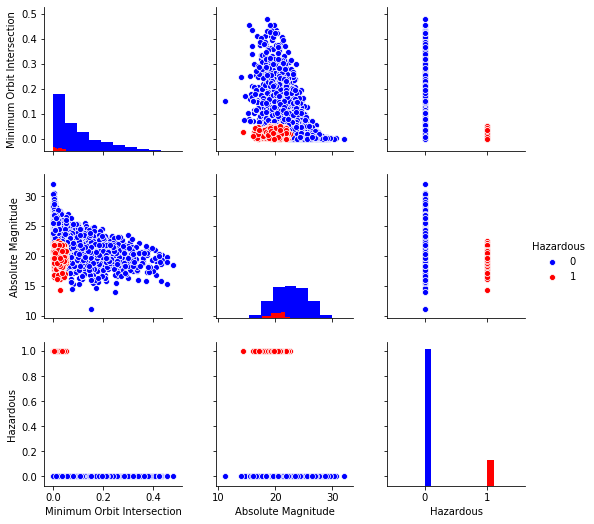

In [29]:
#pairplot to see relationship between 'Minimum Orbit Intersection', 'Absolute Magnitude', and 'Hazardous'
sns.pairplot(asteroid_train[['Minimum Orbit Intersection', 'Absolute Magnitude', 'Hazardous' ]], diag_kind = 'hist', hue='Hazardous', palette = {1:'red', 0:'blue'})
plt.show()

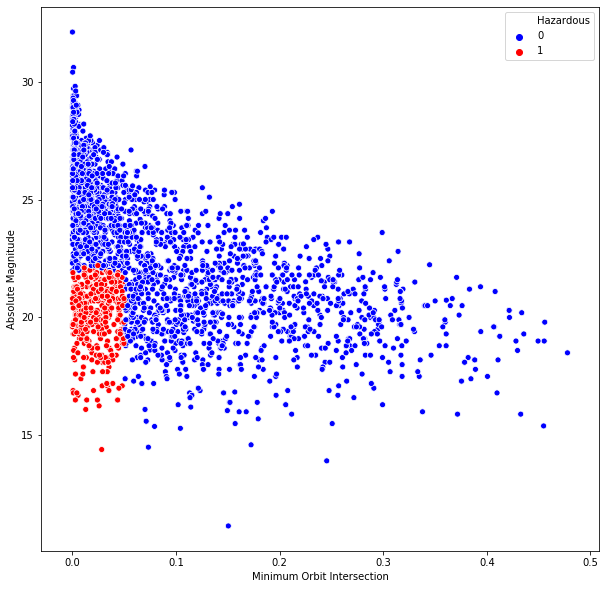

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(asteroid_train['Minimum Orbit Intersection'], asteroid_train['Absolute Magnitude'], hue = asteroid_train['Hazardous'], palette={1: 'red', 0:'blue'})
plt.show()

From these plots, we can see that asteroids in the datatset which are hazardous have an **Absolute Magnitude** between roughly 15 and 23 H, with a **Minimum Orbit Intersection** between roughly 0 and 0.05 au. This dataset reflects the NASA's definition of potentially hazardous asteroids. 

If we just have these two features to train a model to predict whether an asteroid is hazardous, we can implement a simple binary logistic regression classifier. Let's try that.

**BIVARIATE BINARY CLASSIFIER**

In [16]:
asteroid_train[['Minimum Orbit Intersection','Absolute Magnitude']].describe()

,Minimum Orbit Intersection,Absolute Magnitude
count,2811.000000,2811.000000
mean,0.081918,22.313652
std,0.090566,2.898661
min,0.000002,11.160000
25%,0.013968,20.125500
50%,0.046934,22.000000
75%,0.120841,24.500000
max,0.477891,32.100000


From the plots and the table above, there are no significant outliers in the context of asteroid measurements. However, since a couple of points are scattered well away from the bulk of the distribution, we will use the robust scaler to scale the data before training. The robust scaler uses the interquartile range to scale, and is thus not influenced by outliers.

First, we will scale **Absolute Magnitude** and **Minimum Orbit Intersection** using sklearn's Robust scaler. We will scale these two features in the train, validation, and test sets.

In [17]:
pd.set_option('mode.chained_assignment', None)

from sklearn.preprocessing import robust_scale

for col in ['Absolute Magnitude', 'Minimum Orbit Intersection']:
    asteroid_train[col + "_scaled"] = robust_scale(asteroid_train[col])
    asteroid_cv[col + "_scaled"] = robust_scale(asteroid_cv[col])
    asteroid_test[col + "_scaled"] = robust_scale(asteroid_test[col])
    features.append(col + '_scaled')
    features.remove(col)

We will now train a logistic regression model using these two scaled features on the training set, and test on the validation set.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [19]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(asteroid_train[['Absolute Magnitude_scaled','Minimum Orbit Intersection_scaled']], asteroid_train['Hazardous'])
predictions = lr.predict(asteroid_cv[['Absolute Magnitude_scaled','Minimum Orbit Intersection_scaled']])

We know that the distribution of the target variable is skewed (it has prominently more 0 labels than 1 labels), therefore accuracy alone will not be a good evaluation of the model. Below is a function that will return a confusion matrix and will calculate precision, recall, null accuracy, specificity, and the F_score.

In [20]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import accuracy_score


def evaluation(test_y, predictions):
    
    #accuracy score
    accuracy = accuracy_score(test_y, predictions)
    print("The classification accuracy is {:.2f} %." .format(accuracy*100))
    
  
    y_test_mean = test_y.mean()
    #null accuracy
    null_accuracy = max(y_test_mean, 1-y_test_mean)
    print('The null accuracy is {:.2f} %.'.format(null_accuracy*100))
    
    #confusion matrix
    skplt.metrics.plot_confusion_matrix(test_y, predictions)
    bottom, top = plt.ylim() 
    bottom += 0.5 
    top -= 0.5 
    plt.ylim(bottom, top)
    plt.yticks(rotation = 45)
    plt.show()
    
    conf_matrix = confusion_matrix(test_y, predictions)
    
    TN = conf_matrix[0,0] #true negatives
    FP = conf_matrix[0,1] #false positives
    FN = conf_matrix[1,0] #false negatives
    TP = conf_matrix[1,1] #true positives
    
    #precision
    precision = TP/(TP+FP)*100
    print('The precision is {:.2f} %.'.format(precision))
    #sensitivity/ recall
    recall = TP/(FN+TP)*100
    print('The sensitivity/recall is {:.2f} %.'.format(recall))
    #specificity
    specificity = TN/(FP+TN)*100
    print('The specificity is {:.2f} %.'.format(specificity))
    #F_score
    F_score = (2*precision*recall)/(precision + recall)
    print('The F score is {:.2f} %.'.format(F_score))
    
    return None

The classification accuracy is 92.75 %.
The null accuracy is 83.48 %.


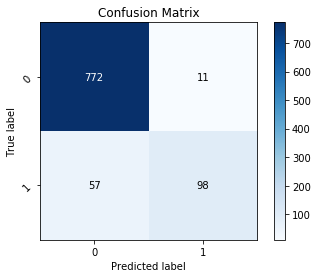

The precision is 89.91 %.
The sensitivity/recall is 63.23 %.
The specificity is 98.60 %.
The F score is 74.24 %.


In [21]:
evaluation(asteroid_cv['Hazardous'], predictions)

Although the model predicts the label correctly 92.75% of the time, this does not give a true picture of the model's performance as the distribution of the target variable is skewed. This is reflected in the null accuracy score (the score if the model predicted the dominant class at all times). The classification accuracy is only four precentage points greater than the null accuracy. 

For the task of hazardous asteroid prediction, it is important that when an asteroid is hazardous, the model correctly predicts that it is. This is measured by recall and this model's recall is 89.91%. If we wanted to increase recall, we can lower the prediction threshold from 0.5 (the default in sklearn's Logistic Regression estimator) to a lower number. 


**SVM CLASSIFIER**

Could a SVM classifier yield better results? We will use the Gaussian kernel function. 

In [22]:
from sklearn.svm import SVC

svm = SVC(C=1.5, kernel='rbf', gamma='scale')
svm.fit(asteroid_train[['Absolute Magnitude_scaled','Minimum Orbit Intersection_scaled']], asteroid_train['Hazardous'])
svm_pred = svm.predict(asteroid_cv[['Absolute Magnitude_scaled','Minimum Orbit Intersection_scaled']])

The classification accuracy is 97.65 %.
The null accuracy is 83.48 %.


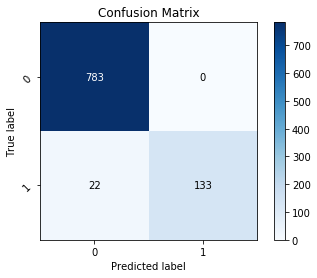

The precision is 100.00 %.
The sensitivity/recall is 85.81 %.
The specificity is 100.00 %.
The F score is 92.36 %.


In [23]:
evaluation(asteroid_cv['Hazardous'], svm_pred)

The evaluation scores of the SVM classifier model on the validation data is an improvement on the evaluation scores of the Logistic Regression model. We will predict using the test set as well.

The classification accuracy is 97.97 %.
The null accuracy is 83.05 %.


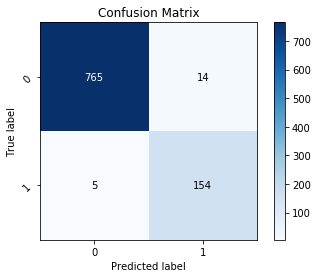

The precision is 91.67 %.
The sensitivity/recall is 96.86 %.
The specificity is 98.20 %.
The F score is 94.19 %.


In [24]:
#test set predictions
svm_pred = svm.predict(asteroid_test[['Absolute Magnitude_scaled','Minimum Orbit Intersection_scaled']])
evaluation(asteroid_test['Hazardous'], svm_pred)

The recall on the test set is higher than on the validation set, and the precision is lower.

**DECISION BOUNDARIES**

Both of the models above have only two features which means we can plot the decision boundary of each model. It will give a useful insight into how each classifier splits the data.

In [25]:
X1 = asteroid_test['Absolute Magnitude_scaled']
X2 = asteroid_test['Minimum Orbit Intersection_scaled']
#create meshgrid for contour plot
x1, x2 = np.meshgrid(np.arange(X1.min() - 0.25, X1.max() + 0.25, 0.01), 
                     np.arange(X2.min() - 0.25, X2.max() + 0.25, 0.01))

**Decision Boundary for logistic classifier model**

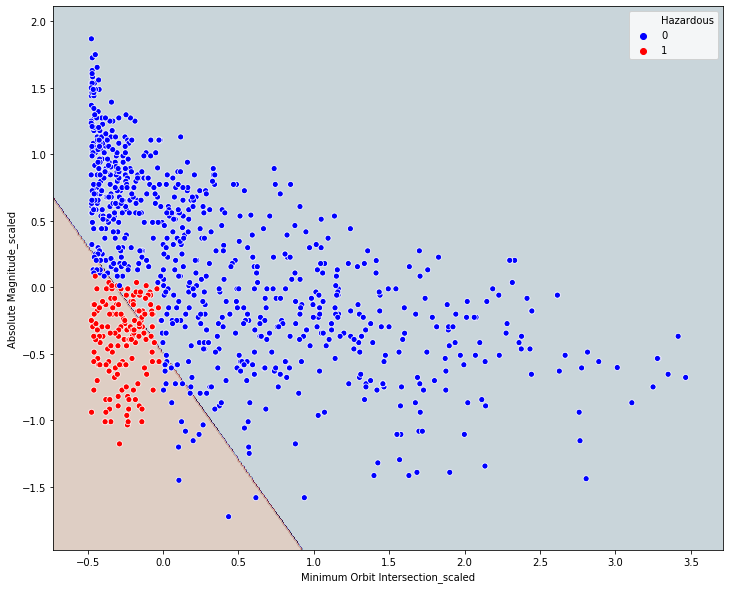

In [26]:
L = lr.predict(np.c_[x1.ravel(), x2.ravel()])
L = L.reshape(x1.shape)
#plot boundary and points
plt.figure(figsize=(12,10))
plt.contourf(x2, x1, L, cmap=plt.cm.twilight, alpha=0.8)
#plt.scatter(asteroid_test['Minimum Orbit Intersection_scaled'],asteroid_test['Absolute Magnitude_scaled'], 
          # cmap=plt.cm.coolwarm, s=20, edgecolors='k')
sns.scatterplot(asteroid_test['Minimum Orbit Intersection_scaled'],asteroid_test['Absolute Magnitude_scaled'], hue=asteroid_test['Hazardous'],  palette = {1:'red', 0:'blue'})
plt.show()

The decision boundary of the logistic regression classifier is a straight line that cuts through the points to minimise the mean squared error. The trained boundary captures most of the points of the test data set in the correct class but could be improved. Would polynomial features help?

**Decision Boundary for svm (with gaussian kernel) classifier model**

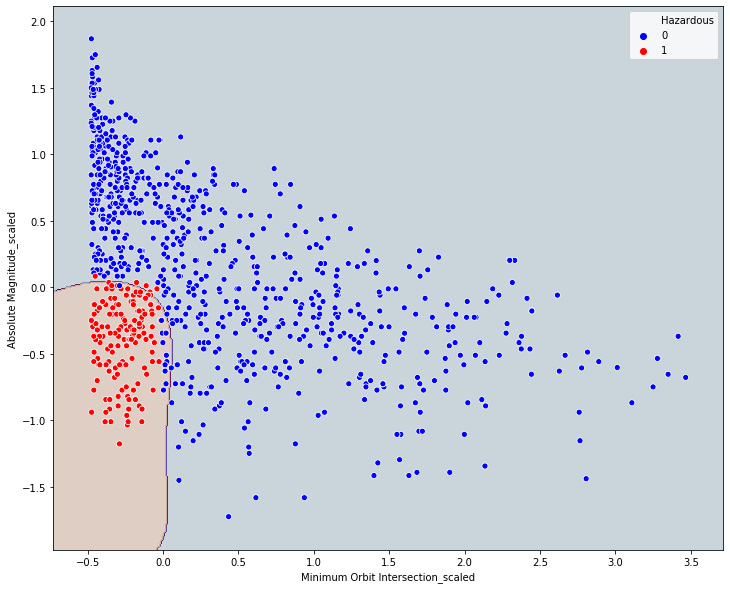

In [27]:
Z = svm.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)
#plot boundary and points
plt.figure(figsize=(12,10))
plt.contourf(x2, x1, Z, cmap=plt.cm.twilight, alpha=0.8)
#plt.scatter(asteroid_test['Minimum Orbit Intersection_scaled'],asteroid_test['Absolute Magnitude_scaled'], 
          # cmap=plt.cm.coolwarm, s=20, edgecolors='k')
sns.scatterplot(asteroid_test['Minimum Orbit Intersection_scaled'],asteroid_test['Absolute Magnitude_scaled'], hue=asteroid_test['Hazardous'],  palette = {1:'red', 0:'blue'})
plt.show()

The decision boundary of the svm classifier is a curved line that cuts through the points in a way as to maximise the distance between the positive and negative examples. Here the trained boundary curves around the test data points in such a way that it captures nearly all the points in its correct class.

Based on the our observation of the logistic regression model, it will be insightful to train and test a model with polynomial features of two or three degrees.

Logistic Regression with polynomial features degree 2 scores: 

The classification accuracy is 95.95 %.
The null accuracy is 83.48 %.


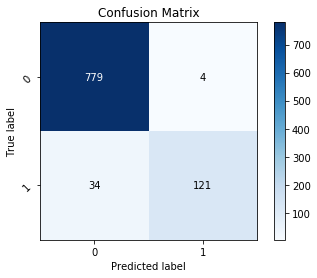

The precision is 96.80 %.
The sensitivity/recall is 78.06 %.
The specificity is 99.49 %.
The F score is 86.43 %.


Logistic Regression with polynomial features degree 3 scores: 

The classification accuracy is 96.06 %.
The null accuracy is 83.48 %.


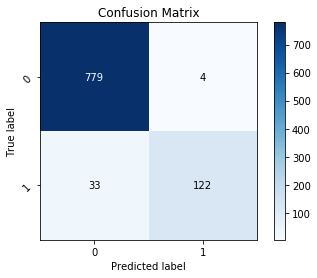

The precision is 96.83 %.
The sensitivity/recall is 78.71 %.
The specificity is 99.49 %.
The F score is 86.83 %.




In [28]:
#train and test Logistic regression model with polynomial features

from sklearn.preprocessing import PolynomialFeatures

for i in [2,3]:
    poly = PolynomialFeatures(i)
    X = poly.fit_transform(asteroid_train[['Absolute Magnitude_scaled','Minimum Orbit Intersection_scaled']])
    
    lr_poly = LogisticRegression(solver='lbfgs')
    lr_poly.fit(X, asteroid_train['Hazardous'])
    X_cv = poly.fit_transform(asteroid_cv[['Absolute Magnitude_scaled','Minimum Orbit Intersection_scaled']])
    pred_poly = lr_poly.predict(X_cv)
    
    print('Logistic Regression with polynomial features degree {} scores: \n'.format(i))
    evaluation(asteroid_cv['Hazardous'], pred_poly)
    print('\n')


The logistic regression classifier with polynomial features has better precision, recall, and accuracy than the linear logistic regressor. There is hardly any difference in the scores betwwen the model with polynomial features of degree 2 and that with polynomial features of degree 3. The svm model has better recall than any of the logistic regressor models. 